Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.


Tarkib

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

Ustunlar

Pregnancies: homilador bo'lish soni

Glucose: glyukozaga test natijasi

BloodPressure: diastolik qon bosimi (mm Hg)

SkinThickness: Triceps teri burmasining qalinligi (mm)

Insulin: 2 soatlik sarum insulini (mu U/ml)

BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)

DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi

Age: Yosh (yil)

Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [ ]:
# kerkali kutubxonalarni yuklab olamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [ ]:
# datasetimizni yuklab olamiz
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# ma'lumotlar shaklini ko'rish
df.shape

(768, 9)

In [ ]:
# nan qiymatlar bor yo'qligini aniqlash
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# dataset haqida umumiy ma'lumotlar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# dataset statistikasi
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# correlation bor yo'qligini tekshiramiz
con_matrix = df.corr().abs()
con_matrix.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [47]:
df.corrwith(df["Outcome"]).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [ ]:
# ma'lumotlarni ajratib olamiz
X = df.drop('Outcome', axis=1)
Y = df["Outcome"]

In [ ]:
# ma'lumotlarni standartizatsiya qilib olamiz, yani hammasini bitta oraliqa tushirib olamiz
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [ ]:
# ma'lumotlarni test va train uchun ajratib olamiz
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Modelni train qilish

In [21]:
# eng yaxshi k ni topib olamiz
knn = KNeighborsClassifier(n_neighbors=5)
param_grid= {"n_neighbors": range(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

In [24]:
knn_gscv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)})

In [25]:
knn_gscv.cv_results_["rank_test_score"]

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13])

In [26]:
# eng yaxshi k
knn_gscv.best_params_

{'n_neighbors': 17}

In [27]:
# eng yaxshi natija
knn_gscv.best_score_

0.7669892199303965

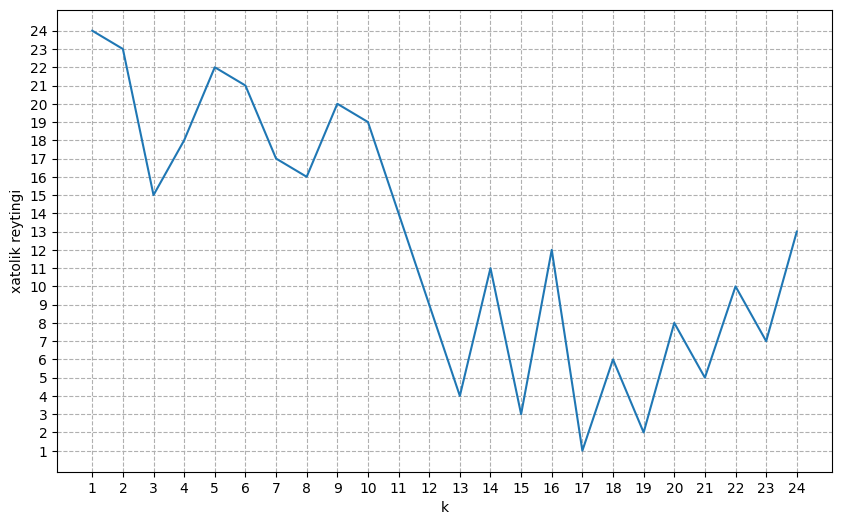

In [ ]:
# ma'lumotlarni grafik holatda chiqarish
plt.figure(figsize=(10,6))
sns.lineplot(x=param_grid["n_neighbors"], y=knn_gscv.cv_results_["rank_test_score"])
plt.xticks(param_grid['n_neighbors'])
plt.yticks(knn_gscv.cv_results_["rank_test_score"])
plt.xlabel("k")
plt.ylabel("xatolik reytingi")
plt.grid(linestyle="--")
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

### Modelni bahoylamiz

In [31]:
pred = knn.predict(x_test)

In [32]:
print (metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [33]:
print (metrics.accuracy_score(y_test, pred))

0.7532467532467533


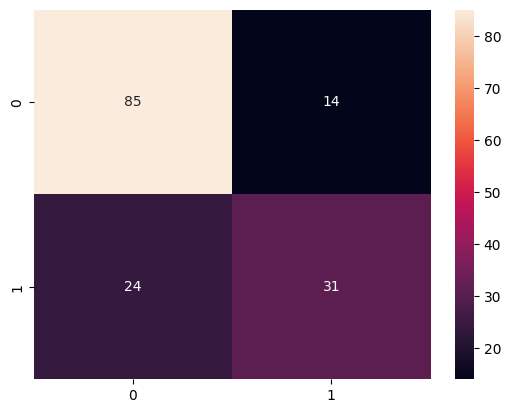

In [34]:
sns.heatmap(metrics.confusion_matrix(y_test, pred), annot=True)
plt.show()

In [ ]:
# Bizda ma'lumotlar kam bo'lganligi uchun corss validation dan foydalanamiz

In [42]:
predict = cross_val_predict(estimator=knn, X=X, y=Y, cv=5)

In [43]:
print(metrics.classification_report(Y, predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768



In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
